In [2]:
import glob
import csv
import re  # Import the regular expressions module
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import pingouin as pg

In [3]:


# Read progress data from CSV files and store them into lists
csv_files = glob.glob('progress/progress_*.csv')

# Create empty lists to store data from all files
perfect_pro = []
imperfect_pro = []
non_recover_pro = []
recover_pro = []
error_pro = []
challenge_pro = []
effective_pro = []
alternative_pro = []
confused_pro = []
easy_pro = []




# Loop through each file
for csv_file in csv_files:
    arrays_from_csv = []
    sentences_from_csv = []
    # Open and read the CSV file
    with open(csv_file, 'r') as file:
        for row in file:
            # Check if the first element can be converted to an integer
            try:
                int(row[0])
                is_numeric = True
            except ValueError:
                is_numeric = False
            
            if is_numeric:
                line = re.split('[ ,]', row.strip())
                arrays_from_csv.append([int(x) for x in line])
            else:
                sentences_from_csv.append(row)
                
    perfect_pro.append(arrays_from_csv[0])
    imperfect_pro.append(arrays_from_csv[1])
    non_recover_pro.append(arrays_from_csv[2])
    recover_pro.append(arrays_from_csv[3])
    error_pro.append(arrays_from_csv[4])
    challenge_pro.append(arrays_from_csv[5])
    effective_pro.append(arrays_from_csv[6])
    alternative_pro.append(arrays_from_csv[7])
    confused_pro.append(sentences_from_csv[0])
    easy_pro.append(sentences_from_csv[1])

print("perfect_pro: ", perfect_pro)
print("confused_pro:", confused_pro)
print("easy_pro: ", easy_pro)


perfect_pro:  [[20, 0, 50, 80, 50, 100, 50, 80, 90, 80, 50, 80, 100, 100, 100], [0, 10, 25, 10, 0, 0, 10, 10, 10, 10, 5, 5, 3, 2, 3], [10, 5, 20, 30, 35, 45, 50, 53, 65, 68, 70, 80, 90, 95, 100], [20, 27, 35, 38, 39, 40, 50, 56, 58, 73, 78, 85, 82, 98, 100], [30, 35, 60, 70, 75, 85, 87, 90, 93, 95, 96, 97, 100, 100, 100], [5, 7, 15, 17, 19, 20, 22, 25, 25, 27, 30, 45, 60, 70, 90], [20, 18, 25, 35, 37, 40, 48, 55, 60, 65, 74, 85, 100, 100, 100], [25, 25, 40, 45, 48, 50, 55, 60, 74, 80, 90, 95, 100, 100, 100], [20, 30, 50, 55, 70, 80, 85, 95, 96, 97, 98, 99, 99, 99, 100], [20, 25, 25, 40, 50, 60, 70, 80, 85, 90, 95, 97, 99, 99, 99], [10, 10, 15, 20, 20, 50, 50, 60, 65, 70, 70, 85, 100, 100, 100], [20, 20, 30, 35, 38, 40, 45, 55, 59, 70, 75, 80, 90, 95, 100], [20, 20, 35, 35, 40, 50, 55, 65, 65, 70, 70, 75, 80, 80, 90], [20, 20, 25, 30, 32, 40, 45, 55, 59, 70, 75, 80, 100, 100, 100], [20, 20, 20, 20, 20, 40, 40, 55, 58, 60, 60, 90, 100, 100, 100], [10, 10, 65, 75, 75, 80, 84, 85, 87, 89, 

In [4]:
csv_files = glob.glob('preference/progress_*.csv')

# Create empty lists to store data from all files
perfect_pre = []
imperfect_pre = []
non_recover_pre = []
recover_pre = []
error_pre = []
challenge_pre = []
effective_pre = []
alternative_pre = []
confused_pre = []
easy_pre = []

# Loop through each file
for csv_file in csv_files:
    arrays_from_csv = []
    sentences_from_csv = []
    # Open and read the CSV file
    with open(csv_file, 'r') as file:
        for row in file:
            # Check if the first element can be converted to an integer
            try:
                int(row[0])
                is_numeric = True
            except ValueError:
                is_numeric = False
            
            if is_numeric:
                line = re.split('[ ,]', row.strip())
                arrays_from_csv.append([int(x) for x in line])
            else:
                sentences_from_csv.append(row)
                
    perfect_pre.append(arrays_from_csv[0])
    imperfect_pre.append(arrays_from_csv[1])
    non_recover_pre.append(arrays_from_csv[2])
    recover_pre.append(arrays_from_csv[3])
    error_pre.append(arrays_from_csv[4])
    challenge_pre.append(arrays_from_csv[5])
    effective_pre.append(arrays_from_csv[6])
    alternative_pre.append(arrays_from_csv[7])
    confused_pre.append(sentences_from_csv[0])
    easy_pre.append(sentences_from_csv[1])

22


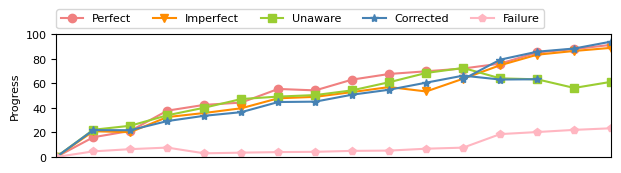

In [5]:
print(len(perfect_pro))
import matplotlib.patches as patches
# Function to calculate mean and standard deviation
def calc_mean_std(data):
    data_np = np.array(data)
    mean = np.mean(data_np, axis=0)
    std = np.std(data_np, axis=0)
    return mean, std

# Calculate mean and standard deviation for each category
mean_perfect, std_perfect = calc_mean_std(perfect_pro)
mean_imperfect, std_imperfect = calc_mean_std(imperfect_pro)
mean_non_recover, std_non_recover = calc_mean_std(non_recover_pro)
mean_recover, std_recover = calc_mean_std(recover_pro)
mean_error, std_error = calc_mean_std(error_pro)

# Set the font size to match IEEE standard
plt.rcParams.update({'font.size': 8, 'axes.labelsize': 8, 'legend.fontsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8})

# Width and height for a double-column figure in IEEE format
fig_width = 7.16   # width in inches
fig_height = (fig_width / 36) * 8 # height in inches to maintain 9:6 ratio for each subplot

# Create the line plot
plt.figure(figsize=(fig_width, fig_height))

# Adding a zero at the beginning and shifting the line one point to the right
def shift_and_prepend_zero(data):
    return [0] + list(data)

# Plotting without error bars, using fancy colors
plt.plot(range(len(mean_perfect)+1), shift_and_prepend_zero(mean_perfect), label='Perfect', linestyle='-', marker='o', color='lightcoral')
plt.plot(range(len(mean_imperfect)+1), shift_and_prepend_zero(mean_imperfect), label='Imperfect', linestyle='-', marker='v', color='darkorange')
plt.plot(range(len(mean_non_recover)+1), shift_and_prepend_zero(mean_non_recover), label='Unaware', linestyle='-', marker='s', color='yellowgreen')

# Split the data at index 11 for recover_pro
x_values1 = [0] + list(range(1, 14))  # shifted by 1 to the right
 # shifted by 1 to the right
y_values1 = shift_and_prepend_zero(mean_recover[:13])

x_values2 = list(range(11, 11 + len(mean_recover[13:])))  # shifted by 1 to the right
y_values2 = mean_recover[13:]

plt.plot(x_values1, y_values1, linestyle='-', marker='*', color='steelblue', label='Corrected')
plt.plot(x_values2, y_values2, linestyle='-', marker='*', color='steelblue')

plt.plot(range(len(mean_error)+1), shift_and_prepend_zero(mean_error), label='Failure', linestyle='-', marker='p', color='lightpink')

# Assuming the overlap point is the start of x_values2 and the end of x_values1:
overlap_x = x_values2[0]
overlap_y = y_values2[0]

# # Draw a vertically elongated ellipse around the overlap point
# ellipse_width = 1  # Horizontal diameter (adjust as needed)
# ellipse_height = 10  # Vertical diameter (adjust as needed)
# ellipse = patches.Ellipse((overlap_x, overlap_y), ellipse_width, ellipse_height, color='red', fill=False)
# plt.gca().add_patch(ellipse)


# Add labels and title
plt.xlabel('Step')
plt.ylabel('Progress')
# plt.title('Line Plot of average progress')
plt.ylim(0, 100)
# Set the x-axis limits and ticks
plt.xlim(0, 15)
plt.xticks(range(0, 15))

plt.xlabel("")
#set x sticks off
plt.xticks([])

plt.legend(loc = [0,1.05], ncol=5)

# Show the grid
# plt.grid(True)

# Show the plot
plt.savefig('progress.png', dpi=1000, bbox_inches='tight')
plt.show()


22


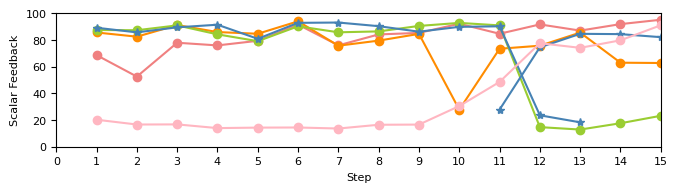

In [6]:
print(len(perfect_pre))
# Function to calculate mean and standard deviation
def calc_mean_std(data):
    data_np = np.array(data)
    mean = np.mean(data_np, axis=0)
    std = np.std(data_np, axis=0)
    return mean, std

# Adding a zero at the beginning and shifting the line one point to the right
def shift_and_prepend_zero(data):
    return [0] + list(data)
# Set the font size to match IEEE standard
plt.rcParams.update({'font.size': 8, 'axes.labelsize': 8, 'legend.fontsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8})

# Width and height for a double-column figure in IEEE format
fig_width = 7.8  # width in inches
fig_height = (fig_width / 36) * 8 # height in inches to maintain 9:6 ratio for each subplot

# Create the line plot
plt.figure(figsize=(fig_width, fig_height))


# Calculate mean and standard deviation for each *_pre category
mean_perfect_pre, std_perfect_pre = calc_mean_std(perfect_pre)
mean_imperfect_pre, std_imperfect_pre = calc_mean_std(imperfect_pre)
mean_non_recover_pre, std_non_recover_pre = calc_mean_std(non_recover_pre)
mean_recover_pre, std_recover_pre = calc_mean_std(recover_pre)
mean_error_pre, std_error_pre = calc_mean_std(error_pre)

# Plotting without error bars, using fancy colors
plt.plot(range(1, len(mean_perfect_pre)+1), mean_perfect_pre, label='Perfect', linestyle='-', marker='o', color='lightcoral')
plt.plot(range(1, len(mean_imperfect_pre)+1), mean_imperfect_pre, label='Imperfect', linestyle='-', marker='o', color='darkorange')
plt.plot(range(1, len(mean_non_recover_pre)+1), mean_non_recover_pre, label='Unaware', linestyle='-', marker='o', color='yellowgreen')

# Split the data at index 11 for recover_pro
x_values1 = list(range(1, 14))  # shifted by 1 to the right
y_values1 = mean_recover_pre[:13]

x_values2 = list(range(11, 11 + len(mean_recover_pre[13:])))  # shifted by 1 to the right
y_values2 = mean_recover_pre[13:]

plt.plot(x_values1, y_values1, linestyle='-', marker= '*', color='steelblue', label='Corrected')
plt.plot(x_values2, y_values2, linestyle='-', marker= '*', color='steelblue')

plt.plot(range(1, len(mean_error_pre)+1), mean_error_pre, label='Failure', linestyle='-', marker='o', color='lightpink')


# Assuming the overlap point is the start of x_values2 and the end of x_values1:
overlap_x = x_values2[0]
overlap_y = y_values2[0]

# # Draw a vertically elongated ellipse around the overlap point
# ellipse_width = 1  # Horizontal diameter (adjust as needed)
# ellipse_height = 10  # Vertical diameter (adjust as needed)
# ellipse = patches.Ellipse((overlap_x, overlap_y), ellipse_width, ellipse_height, color='red', fill=False)
# plt.gca().add_patch(ellipse)

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Scalar Feedback')
# plt.title('Line Plot of average preference')
plt.ylim(0, 100)
# Set the x-axis limits and ticks
plt.xlim(0, 15)
plt.xticks(range(0, 16))

# plt.legend(loc = [0,1.1], ncol=5)
# plt.legend(loc = [0,1.1], ncol=5)


# Show the grid

plt.savefig('preference.png', dpi=1000, bbox_inches='tight')
# Show the plot
plt.show()




(0.0, 100.0)

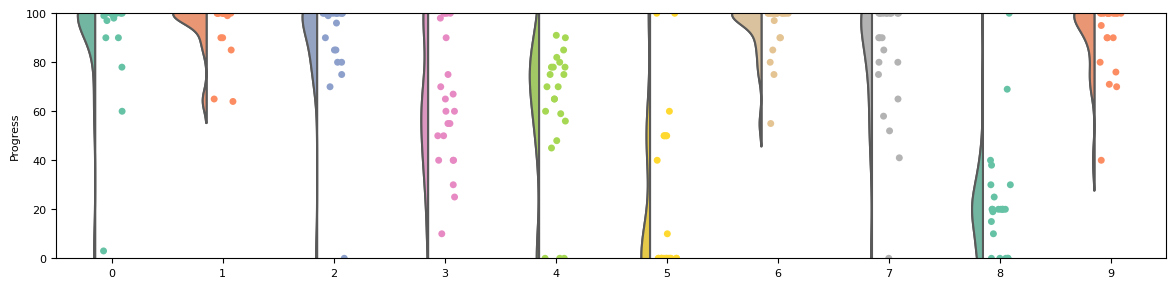

In [7]:
import ptitprince as pt
#plot a half voilin plot for the end point of each category
# and plot pro and pre side by side
# Create a figure instance



fig_width = 7.16*2   # width in inches
fig_height = (fig_width / 36) * 8 # height in inches to maintain 9:6 ratio for each subplot
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Create a raincloud plot
## plot pro and pre side by side
# each dot is the last element of the array
# Create a raincloud plot
# reference code
# pal = "Set2"
# f, ax = plt.subplots(figsize=(7, 5))
# ax=pt.half_violinplot(  data =data , 
#                       palette = pal, bw = .2,scale = "area", width = .6, inner = None)
# ax=sns.stripplot( data = data, palette = pal, edgecolor = "white",
# size = 5, jitter = 1, zorder = 0)
# ax=sns.boxplot( data = data, color = "black", width = .15, zorder = 10,\
#                showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
# showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
# saturation = 1)
# plt.ylabel("Number of Significant", fontsize = 30)
# plt.ylim(0,45)
# ax.set_xticklabels(["Binary", "Scalar"])
# #plt.ylabel("y - label")

pro_perfect_end = [x[-1] for x in perfect_pro]
pre_perfect_end = [x[-1] for x in perfect_pre]

pro_imperfect_end = [x[-1] for x in imperfect_pro]
pre_imperfect_end = [x[-1] for x in imperfect_pre]

pro_non_recover_end = [x[-1] for x in non_recover_pro]
pre_non_recover_end = [x[-1] for x in non_recover_pre]

pro_recover_end = [x[-1] for x in recover_pro]
pre_recover_end = [x[-1] for x in recover_pre]

pro_error_end = [x[-1] for x in error_pro]
pre_error_end = [x[-1] for x in error_pre]

data = [pro_perfect_end, pre_perfect_end, pro_imperfect_end, pre_imperfect_end, pro_non_recover_end, pre_non_recover_end, pro_recover_end, pre_recover_end, pro_error_end, pre_error_end]
pal = "Set2"
ax=pt.half_violinplot(  data =data , 
                      palette = pal, bw = .4,scale = "area", width = .6, inner = None)
ax=pt.half_violinplot(  data =data ,
                        palette = pal, bw = .4,scale = "area", width = .6, inner = None)
ax=pt.stripplot( data = data, palette = pal, edgecolor = "white",
size = 5, jitter = 1, zorder = 0)
plt.ylabel("Progress", fontsize = 8)
plt.ylim(0,100)



In [8]:
# print mean of each category
print("mean of pro_perfect_end: ", np.mean(pro_perfect_end))
print("mean of pre_perfect_end: ", np.mean(pre_perfect_end))
print("mean of pro_imperfect_end: ", np.mean(pro_imperfect_end))
print("mean of pre_imperfect_end: ", np.mean(pre_imperfect_end))
print("mean of pro_non_recover_end: ", np.mean(pro_non_recover_end))
print("mean of pre_non_recover_end: ", np.mean(pre_non_recover_end))
print("mean of pro_recover_end: ", np.mean(pro_recover_end))
print("mean of pre_recover_end: ", np.mean(pre_recover_end))
print("mean of pro_error_end: ", np.mean(pro_error_end))
print("mean of pre_error_end: ", np.mean(pre_error_end))

# print standard deviation without outliers of each category
print("standard deviation of pro_perfect_end: ", np.std(pro_perfect_end))
print("standard deviation of pre_perfect_end: ", np.std(pre_perfect_end))
print("standard deviation of pro_imperfect_end: ", np.std(pro_imperfect_end))
print("standard deviation of pre_imperfect_end: ", np.std(pre_imperfect_end))
print("standard deviation of pro_non_recover_end: ", np.std(pro_non_recover_end))
print("standard deviation of pre_non_recover_end: ", np.std(pre_non_recover_end))
print("standard deviation of pro_recover_end: ", np.std(pro_recover_end))
print("standard deviation of pre_recover_end: ", np.std(pre_recover_end))
print("standard deviation of pro_error_end: ", np.std(pro_error_end))
print("standard deviation of pre_error_end: ", np.std(pre_error_end))

#print IQR of each category
print("IQR of pro_perfect_end: ", np.percentile(pro_perfect_end, 75) - np.percentile(pro_perfect_end, 25))
print("IQR of pre_perfect_end: ", np.percentile(pre_perfect_end, 75) - np.percentile(pre_perfect_end, 25))
print("IQR of pro_imperfect_end: ", np.percentile(pro_imperfect_end, 75) - np.percentile(pro_imperfect_end, 25))
print("IQR of pre_imperfect_end: ", np.percentile(pre_imperfect_end, 75) - np.percentile(pre_imperfect_end, 25))
print("IQR of pro_non_recover_end: ", np.percentile(pro_non_recover_end, 75) - np.percentile(pro_non_recover_end, 25))
print("IQR of pre_non_recover_end: ", np.percentile(pre_non_recover_end, 75) - np.percentile(pre_non_recover_end, 25))
print("IQR of pro_recover_end: ", np.percentile(pro_recover_end, 75) - np.percentile(pro_recover_end, 25))
print("IQR of pre_recover_end: ", np.percentile(pre_recover_end, 75) - np.percentile(pre_recover_end, 25))
print("IQR of pro_error_end: ", np.percentile(pro_error_end, 75) - np.percentile(pro_error_end, 25))
print("IQR of pre_error_end: ", np.percentile(pre_error_end, 75) - np.percentile(pre_error_end, 25))



# print t-test result
print("t-test result between pro_perfect_end and pre_perfect_end: ", ttest_ind(pro_perfect_end, pre_perfect_end))
print("t-test result between pro_imperfect_end and pre_imperfect_end: ", ttest_ind(pro_imperfect_end, pre_imperfect_end))
print("t-test result between pro_non_recover_end and pre_non_recover_end: ", ttest_ind(pro_non_recover_end, pre_non_recover_end))
print("t-test result between pro_recover_end and pre_recover_end: ", ttest_ind(pro_recover_end, pre_recover_end))
print("t-test result between pro_error_end and pre_error_end: ", ttest_ind(pro_error_end, pre_error_end))

#print bayesian t-test result using pingouin
print("bayesian t-test result between pro_perfect_end and pre_perfect_end: ", pg.bayesfactor_ttest(ttest_ind(pro_perfect_end, pre_perfect_end).statistic, len(pro_perfect_end), len(pre_perfect_end)))
print("bayesian t-test result between pro_imperfect_end and pre_imperfect_end: ", pg.bayesfactor_ttest(ttest_ind(pro_imperfect_end, pre_imperfect_end).statistic, len(pro_imperfect_end), len(pre_imperfect_end)))
print("bayesian t-test result between pro_non_recover_end and pre_non_recover_end: ", pg.bayesfactor_ttest(ttest_ind(pro_non_recover_end, pre_non_recover_end).statistic, len(pro_non_recover_end), len(pre_non_recover_end)))
print("bayesian t-test result between pro_recover_end and pre_recover_end: ", pg.bayesfactor_ttest(ttest_ind(pro_recover_end, pre_recover_end).statistic, len(pro_recover_end), len(pre_recover_end)))
print("bayesian t-test result between pro_error_end and pre_error_end: ", pg.bayesfactor_ttest(ttest_ind(pro_error_end, pre_error_end).statistic, len(pro_error_end), len(pre_error_end)))



mean of pro_perfect_end:  91.54545454545455
mean of pre_perfect_end:  95.13636363636364
mean of pro_imperfect_end:  89.0909090909091
mean of pre_imperfect_end:  62.72727272727273
mean of pro_non_recover_end:  61.36363636363637
mean of pre_non_recover_end:  23.181818181818183
mean of pro_recover_end:  94.18181818181819
mean of pre_recover_end:  82.0909090909091
mean of pro_error_end:  23.454545454545453
mean of pre_error_end:  91.0
standard deviation of pro_perfect_end:  21.46398097601754
standard deviation of pre_perfect_end:  10.502361009642522
standard deviation of pro_imperfect_end:  21.60999156726328
standard deviation of pre_imperfect_end:  26.15892307030905
standard deviation of pro_non_recover_end:  27.125207086843268
standard deviation of pre_non_recover_end:  32.66724292514718
standard deviation of pro_recover_end:  11.15851229753388
standard deviation of pre_recover_end:  24.925177287432028
standard deviation of pro_error_end:  22.97573279616259
standard deviation of pre_erro

In [19]:
# print t test result between categories in pro
print("t-test result between pro_perfect_end and pro_imperfect_end: ", ttest_ind(pro_perfect_end, pro_imperfect_end))
print("t-test result between pro_perfect_end and pro_non_recover_end: ", ttest_ind(pro_perfect_end, pro_non_recover_end))
print("t-test result between pro_perfect_end and pro_recover_end: ", ttest_ind(pro_perfect_end, pro_recover_end))
print("t-test result between pro_perfect_end and pro_error_end: ", ttest_ind(pro_perfect_end, pro_error_end))

#print bayesian t-test result using pingouin
print("bayesian t-test result between pro_perfect_end and pro_imperfect_end: ", pg.bayesfactor_ttest(ttest_ind(pro_perfect_end, pro_imperfect_end).statistic, len(pro_perfect_end), len(pro_imperfect_end)))
print("bayesian t-test result between pro_perfect_end and pro_non_recover_end: ", pg.bayesfactor_ttest(ttest_ind(pro_perfect_end, pro_non_recover_end).statistic, len(pro_perfect_end), len(pro_non_recover_end)))
print("bayesian t-test result between pro_perfect_end and pro_recover_end: ", pg.bayesfactor_ttest(ttest_ind(pro_perfect_end, pro_recover_end).statistic, len(pro_perfect_end), len(pro_recover_end)))
print("bayesian t-test result between pro_perfect_end and pro_error_end: ", pg.bayesfactor_ttest(ttest_ind(pro_perfect_end, pro_error_end).statistic, len(pro_perfect_end), len(pro_error_end)))



# print t test result between categories in pre
print("t-test result between pre_perfect_end and pre_imperfect_end: ", ttest_ind(pre_perfect_end, pre_imperfect_end))
print("t-test result between pre_perfect_end and pre_non_recover_end: ", ttest_ind(pre_perfect_end, pre_non_recover_end))
print("t-test result between pre_perfect_end and pre_recover_end: ", ttest_ind(pre_perfect_end, pre_recover_end))
print("t-test result between pre_perfect_end and pre_error_end: ", ttest_ind(pre_perfect_end, pre_error_end))


t-test result between pro_perfect_end and pro_imperfect_end:  Ttest_indResult(statistic=0.3692991450213631, pvalue=0.7137601701707494)
t-test result between pro_perfect_end and pro_non_recover_end:  Ttest_indResult(statistic=3.9985492001989136, pvalue=0.00025268740896777623)
t-test result between pro_perfect_end and pro_recover_end:  Ttest_indResult(statistic=-0.49941005430269464, pvalue=0.6200967014554957)
t-test result between pro_perfect_end and pro_error_end:  Ttest_indResult(statistic=9.924105702779965, pvalue=1.4078668520815064e-12)
bayesian t-test result between pro_perfect_end and pro_imperfect_end:  0.3143656957483624
bayesian t-test result between pro_perfect_end and pro_non_recover_end:  98.7535671105646
bayesian t-test result between pro_perfect_end and pro_recover_end:  0.3290377597107537
bayesian t-test result between pro_perfect_end and pro_error_end:  3555797601.99703
t-test result between pre_perfect_end and pre_imperfect_end:  Ttest_indResult(statistic=5.2687217703121

In [ ]:
# 15 1s
binary_label_perfect = [1, 1, 1, 1, 
                        1, 1, 1, 1, 
                        1, 1, 1, 1, 
                        1, 1, 1]

binary_label_imperfect = [1, 1, 1, 1,
                            1, 1, 1, 1, 
                            1, -1, 1, 1, 
                            1, 1, 1]

binary_label_non_recover = [1, 1, 1, 1,
                            1, 1, 1, 1, 
                            1, 1, 1, -1, 
                            0, 0, 0]

binary_label_recover = [1, 1, 1, 1,
                        1, 1, 1, 1, 
                        1, 1, 1, -1, 
                        0, 0, 1, 1,
                        1, 1]

binary_label_error = [1, -1, 0, 0,
                        0, 0, 0, 0, 
                        0, 0, 0, 0, 
                        0, 0, 0]

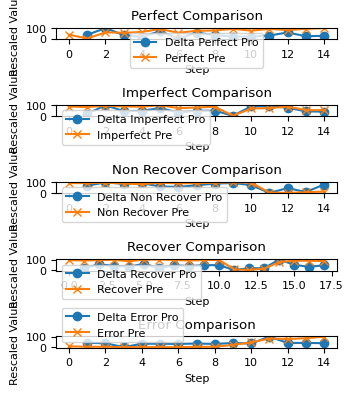

In [9]:
# Your existing calc_mean_std function
def calc_mean_std(data):
    data_np = np.array(data)
    mean = np.mean(data_np, axis=0)
    std = np.std(data_np, axis=0)
    return mean, std

# Min-Max scaling function
def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val) * 100


# Calculate mean for each *_pro and *_pre category
mean_perfect_pro, _ = calc_mean_std(perfect_pro)
mean_imperfect_pro, _ = calc_mean_std(imperfect_pro)
mean_non_recover_pro, _ = calc_mean_std(non_recover_pro)
mean_recover_pro, _ = calc_mean_std(recover_pro)
mean_error_pro, _ = calc_mean_std(error_pro)

mean_perfect_pre, _ = calc_mean_std(perfect_pre)
mean_imperfect_pre, _ = calc_mean_std(imperfect_pre)
mean_non_recover_pre, _ = calc_mean_std(non_recover_pre)
mean_recover_pre, _ = calc_mean_std(recover_pre)
mean_error_pre, _ = calc_mean_std(error_pre)

# Calculate the delta (difference between adjacent mean values)
delta_mean_perfect_pro = np.diff(mean_perfect_pro)
delta_mean_imperfect_pro = np.diff(mean_imperfect_pro)
delta_mean_non_recover_pro = np.diff(mean_non_recover_pro)
delta_mean_recover_pro = np.diff(mean_recover_pro)
delta_mean_error_pro = np.diff(mean_error_pro)

delta_mean_perfect_pre = np.diff(mean_perfect_pre)
delta_mean_imperfect_pre = np.diff(mean_imperfect_pre)
delta_mean_non_recover_pre = np.diff(mean_non_recover_pre)
delta_mean_recover_pre = np.diff(mean_recover_pre)
delta_mean_error_pre = np.diff(mean_error_pre)


# Rescale the delta and *_pre means
rescaled_delta_perfect_pro = min_max_scaling(delta_mean_perfect_pro)
rescaled_delta_imperfect_pro = min_max_scaling(delta_mean_imperfect_pro)
rescaled_delta_non_recover_pro = min_max_scaling(delta_mean_non_recover_pro)
rescaled_delta_recover_pro = min_max_scaling(delta_mean_recover_pro)
rescaled_delta_error_pro = min_max_scaling(delta_mean_error_pro)

rescaled_mean_perfect_pre = min_max_scaling(mean_perfect_pre)
rescaled_mean_imperfect_pre = min_max_scaling(mean_imperfect_pre)
rescaled_mean_non_recover_pre = min_max_scaling(mean_non_recover_pre)
rescaled_mean_recover_pre = min_max_scaling(mean_recover_pre)
rescaled_mean_error_pre = min_max_scaling(mean_error_pre)


plt.rcParams.update({'font.size': 8, 'axes.labelsize': 8, 'legend.fontsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8})

# Width and height for a double-column figure in IEEE format
fig_width = 7.16/2  # width in inches
fig_height = (fig_width / 36) * 8 # height in inches to maintain 9:6 ratio for each subplot

# Create the line plot

# Create the 5x1 subplot
fig, axs = plt.subplots(5, 1, figsize=(fig_width , fig_height* 5))

# Plotting the rescaled delta mean values and *_pre means
categories = ['Perfect', 'Imperfect', 'Non Recover', 'Recover', 'Error']
rescaled_deltas = [rescaled_delta_perfect_pro, rescaled_delta_imperfect_pro, rescaled_delta_non_recover_pro, rescaled_delta_recover_pro, rescaled_delta_error_pro]
rescaled_pres = [rescaled_mean_perfect_pre, rescaled_mean_imperfect_pre, rescaled_mean_non_recover_pre, rescaled_mean_recover_pre, rescaled_mean_error_pre]

for i in range(5):
    axs[i].plot(range(1, len(rescaled_deltas[i]) + 1), rescaled_deltas[i], label=f'Delta {categories[i]} Pro', linestyle='-', marker='o')
    axs[i].plot(range(len(rescaled_pres[i])), rescaled_pres[i], label=f'{categories[i]} Pre', linestyle='-', marker='x')
    
    # if categories[i] == 'Recover':
    #     axs[i].plot(range(11, 14), rescaled_deltas[i][13:16], linestyle='-', marker='o', color=axs[i].lines[0].get_color())  # Overlapping section
    
    axs[i].set_title(f'{categories[i]} Comparison')
    axs[i].set_xlabel('Step')
    axs[i].set_ylabel('Rescaled Value')
    axs[i].legend()

plt.tight_layout()
plt.show()





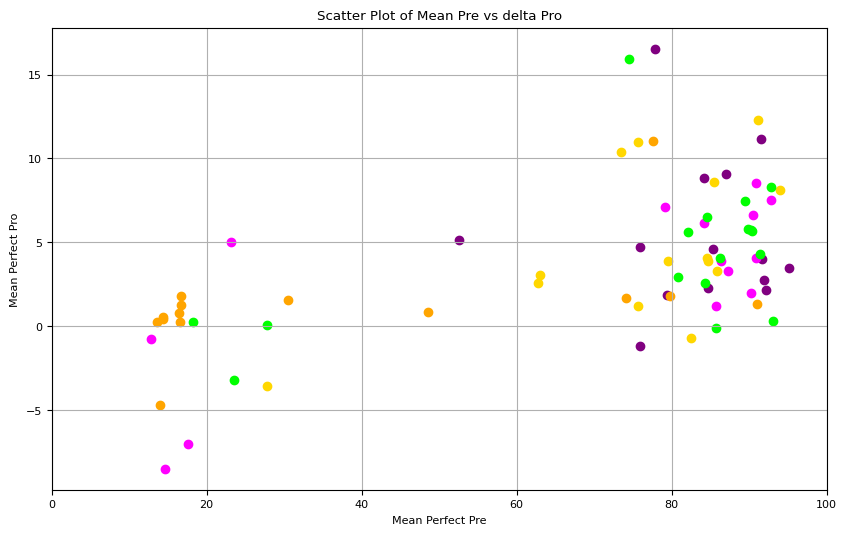

In [10]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(mean_perfect_pre[1:],   delta_mean_perfect_pro, label='Perfect', marker='o', color='purple')
plt.scatter(mean_imperfect_pre[1:], delta_mean_imperfect_pro, label='Imperfect', marker='o', color='gold')
plt.scatter(mean_non_recover_pre[1:], delta_mean_non_recover_pro, label='Non Recover', marker='o', color='magenta')
plt.scatter(mean_recover_pre[1:13], delta_mean_recover_pro[:12], label='Recover', marker='o', color='lime')
plt.scatter(mean_recover_pre[13:], delta_mean_recover_pro[12:], marker='o', color='lime')
plt.scatter(mean_error_pre[1:], delta_mean_error_pro, label='Error', marker='o', color='orange')



# Add labels and title
plt.xlabel('Mean Perfect Pre')
plt.ylabel('Mean Perfect Pro')
plt.title('Scatter Plot of Mean Pre vs delta Pro')

plt.xlim(0, 100)
# plt.ylim(0, 100)
# Show the grid
plt.grid(True)

# Show the plot
plt.show()

[  0   1   2   5   7   8   9  10  15  20  21  25  26  30  31  32  34  35
  36  37  40  41  42  47  48  50  52  55  57  58  60  64  68  70  71  72
  75  76  80  85  90  95  96  99 100]


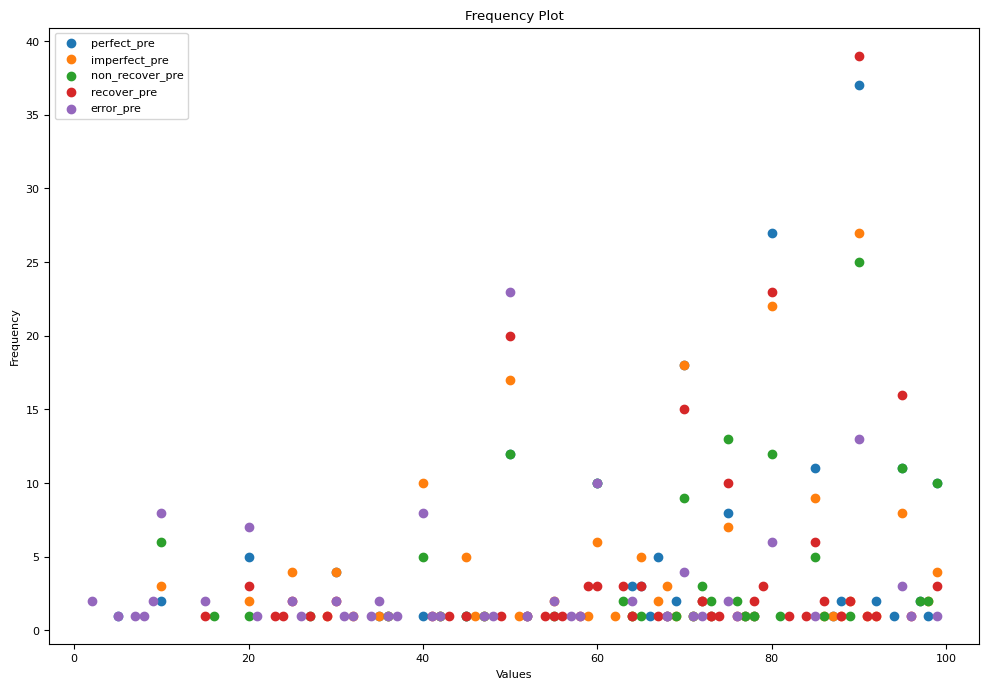

In [11]:
# Combine all arrays into a list of arrays
all_arrays = [perfect_pre, imperfect_pre, non_recover_pre, recover_pre, error_pre]
labels = ['perfect_pre', 'imperfect_pre', 'non_recover_pre', 'recover_pre', 'error_pre']

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each array and plot
for i, arr in enumerate(all_arrays):
    unique_elements, counts_elements = np.unique(arr, return_counts=True)
    plt.scatter(unique_elements[2:-1], counts_elements[2:-1], label=labels[i])
print(unique_elements)
# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency Plot')
plt.legend()

# Show the plot
plt.show()

[0.83249915]
[0.86186563]
[0.87075828]


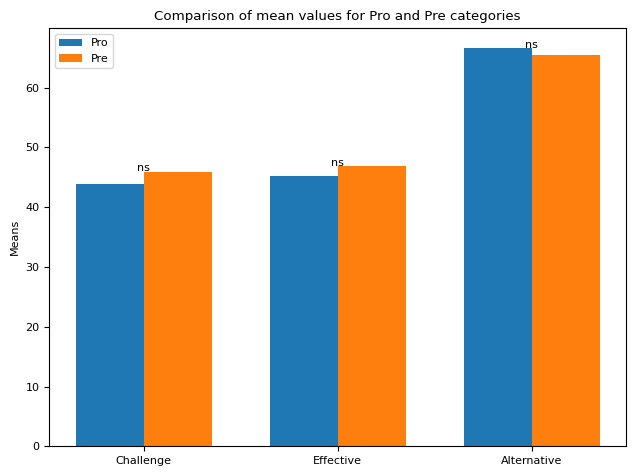

In [12]:



# Calculate mean for each *_pro and *_pre category
mean_challenge_pro, _ = calc_mean_std(challenge_pro)
mean_challenge_pre, _ = calc_mean_std(challenge_pre)
mean_effective_pro, _ = calc_mean_std(effective_pro)
mean_effective_pre, _ = calc_mean_std(effective_pre)
mean_alternative_pro, _ = calc_mean_std(alternative_pro)
mean_alternative_pre, _ = calc_mean_std(alternative_pre)

# Perform t-tests
_, p_challenge = ttest_ind(challenge_pro, challenge_pre)
_, p_effective = ttest_ind(effective_pro, effective_pre)
_, p_alternative = ttest_ind(alternative_pro, alternative_pre)

# Create the bar plot
labels = ['Challenge', 'Effective', 'Alternative']
pro_means = [np.mean(mean_challenge_pro), np.mean(mean_effective_pro), np.mean(mean_alternative_pro)]
pre_means = [np.mean(mean_challenge_pre), np.mean(mean_effective_pre), np.mean(mean_alternative_pre)]
p_values = [p_challenge, p_effective, p_alternative]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, pro_means, width, label='Pro')
rects2 = ax.bar(x + width/2, pre_means, width, label='Pre')

# Add significance indicators
for i, p_value in enumerate(p_values):
    print(p_value)
    if p_value < 0.1:
        ax.text(x[i], max(pro_means[i], pre_means[i]) + 0.1, '*', ha='center')
    else:
        ax.text(x[i], max(pro_means[i], pre_means[i]) + 0.1, 'ns', ha='center')


# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Means')
ax.set_title('Comparison of mean values for Pro and Pre categories')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import numpy as np
categories = ['Perfect', 'Imperfect', 'Non Recoverable', 'Recoverable', 'Error']
pro_data = [perfect_pro, imperfect_pro, non_recover_pro, recover_pro, error_pro]
pre_data = [perfect_pre, imperfect_pre, non_recover_pre, recover_pre, error_pre]

for i, category in enumerate(categories):
    mean_pro = np.mean(pro_data[i], axis=0)
    mean_pre = np.mean(pre_data[i], axis=0)
    
    if len(mean_pro) >= 2 and len(mean_pre) >= 2:
        pearson_corr, _ = pearsonr(mean_pro, mean_pre)
        spearman_corr, _ = spearmanr(mean_pro, mean_pre)
        kendall_corr, _ = kendalltau(mean_pro, mean_pre)
        
        print(f"{category} Correlations:")
        print(f"  Pearson correlation: {pearson_corr}")
        print(f"  Spearman correlation: {spearman_corr}")
        print(f"  Kendall correlation: {kendall_corr}")
    else:
        print(f"The lengths of mean_pro and mean_pre for {category} must be at least 2 for correlation calculations.")

Perfect Correlations:
  Pearson correlation: 0.8561394398490421
  Spearman correlation: 0.8857142857142855
  Kendall correlation: 0.7333333333333334
Imperfect Correlations:
  Pearson correlation: -0.3661603728984877
  Spearman correlation: -0.6273460950094357
  Kendall correlation: -0.44019642635179784
Non Recoverable Correlations:
  Pearson correlation: -0.3748338289043899
  Spearman correlation: -0.07864167572767856
  Kendall correlation: -0.11483385035264293
Recoverable Correlations:
  Pearson correlation: -0.23948718508682806
  Spearman correlation: -0.44685242518059853
  Kendall correlation: -0.25490196078431376
Error Correlations:
  Pearson correlation: 0.968895682488285
  Spearman correlation: 0.9214285714285713
  Kendall correlation: 0.8095238095238096


In [14]:
categories = ['perfect', 'imperfect', 'non_recover', 'recover', 'error']

pro_data = [delta_mean_perfect_pro, delta_mean_imperfect_pro, delta_mean_non_recover_pro, delta_mean_recover_pro, delta_mean_error_pro]
pre_data = [mean_perfect_pre, mean_imperfect_pre, mean_non_recover_pre, mean_recover_pre, mean_error_pre]

for i, category in enumerate(categories):
    pearson_corr, _ = pearsonr(pro_data[i], pre_data[i][1:])
    spearman_corr, _ = spearmanr(pro_data[i], pre_data[i][1:])
    kendall_corr, _ = kendalltau(pro_data[i], pre_data[i][1:])

    print(f"{category} Correlations:")
    print(f"  Pearson correlation: {pearson_corr}")
    print(f"  Spearman correlation: {spearman_corr}")
    print(f"  Kendall correlation: {kendall_corr}")


perfect Correlations:
  Pearson correlation: -0.01942973796702832
  Spearman correlation: -0.15164835164835166
  Kendall correlation: -0.09890109890109891
imperfect Correlations:
  Pearson correlation: 0.5817554505971301
  Spearman correlation: 0.48624891910201623
  Kendall correlation: 0.3535965568702911
non_recover Correlations:
  Pearson correlation: 0.7328838929822635
  Spearman correlation: 0.6402644138402115
  Kendall correlation: 0.4640954808922571
recover Correlations:
  Pearson correlation: 0.49312214560154455
  Spearman correlation: 0.3921568627450981
  Kendall correlation: 0.24999999999999997
error Correlations:
  Pearson correlation: 0.5126094433340921
  Spearman correlation: 0.7876792445181984
  Kendall correlation: 0.5966941897186163


In [15]:
categories = ['perfect', 'imperfect', 'non_recover', 'recover', 'error']

pro_data =[mean_perfect_pro, mean_imperfect_pro, mean_non_recover_pro, mean_recover_pro, mean_error_pro]
pre_data = [delta_mean_perfect_pre, delta_mean_imperfect_pre, delta_mean_non_recover_pre, delta_mean_recover_pre, delta_mean_error_pre]

for i, category in enumerate(categories):
    pearson_corr, _ = pearsonr(pro_data[i][1:], pre_data[i])
    spearman_corr, _ = spearmanr(pro_data[i][1:], pre_data[i])
    kendall_corr, _ = kendalltau(pro_data[i][1:], pre_data[i])

    print(f"{category} Correlations:")
    print(f"  Pearson correlation: {pearson_corr}")
    print(f"  Spearman correlation: {spearman_corr}")
    print(f"  Kendall correlation: {kendall_corr}")

perfect Correlations:
  Pearson correlation: 0.09111419720882463
  Spearman correlation: 0.054945054945054944
  Kendall correlation: 0.01098901098901099
imperfect Correlations:
  Pearson correlation: 0.033292266493178256
  Spearman correlation: 0.0989010989010989
  Kendall correlation: 0.05494505494505495
non_recover Correlations:
  Pearson correlation: -0.1958170020427499
  Spearman correlation: -0.01098901098901099
  Kendall correlation: 0.01098901098901099
recover Correlations:
  Pearson correlation: 0.1317634665039256
  Spearman correlation: 0.1519607843137255
  Kendall correlation: 0.07352941176470587
error Correlations:
  Pearson correlation: 0.39605124858575924
  Spearman correlation: 0.3872389581988908
  Kendall correlation: 0.28729720245711154


In [16]:
categories = ['perfect', 'imperfect', 'non_recover', 'recover', 'error']

pro_data = [delta_mean_perfect_pro, delta_mean_imperfect_pro, delta_mean_non_recover_pro, delta_mean_recover_pro, delta_mean_error_pro]
pre_data = [delta_mean_perfect_pre, delta_mean_imperfect_pre, delta_mean_non_recover_pre, delta_mean_recover_pre, delta_mean_error_pre]

for i, category in enumerate(categories):
    pearson_corr, _ = pearsonr(pro_data[i], pre_data[i])
    spearman_corr, _ = spearmanr(pro_data[i], pre_data[i])
    kendall_corr, _ = kendalltau(pro_data[i], pre_data[i])

    print(f"{category} Correlations:")
    print(f"  Pearson correlation: {pearson_corr}")
    print(f"  Spearman correlation: {spearman_corr}")
    print(f"  Kendall correlation: {kendall_corr}")
    

perfect Correlations:
  Pearson correlation: 0.6666548734246468
  Spearman correlation: 0.37142857142857144
  Kendall correlation: 0.2527472527472528
imperfect Correlations:
  Pearson correlation: 0.7511830447734348
  Spearman correlation: 0.8241758241758241
  Kendall correlation: 0.6703296703296704
non_recover Correlations:
  Pearson correlation: 0.5842409180464265
  Spearman correlation: 0.13406593406593406
  Kendall correlation: 0.09890109890109891
recover Correlations:
  Pearson correlation: 0.7670535133106027
  Spearman correlation: 0.7058823529411765
  Kendall correlation: 0.5735294117647058
error Correlations:
  Pearson correlation: 0.7181374920740017
  Spearman correlation: 0.28193832599118945
  Kendall correlation: 0.2777777777777778


In [17]:
categories = ['perfect', 'imperfect', 'non_recover', 'recover', 'error']

pro_data = [perfect_pro, imperfect_pro, non_recover_pro, recover_pro, error_pro]
pre_data = [perfect_pre, imperfect_pre, non_recover_pre, recover_pre, error_pre]

for i, category in enumerate(categories):
    pearson_corr = []
    spearman_corr = []
    kendall_corr = []
    for j in range(len(perfect_pro)):
        


SyntaxError: unexpected EOF while parsing (2631701162.py, line 11)

In [ ]:
pro = np.concatenate([mean_perfect_pro, mean_imperfect_pro, mean_non_recover_pro, mean_recover_pro, mean_error_pro])
pre = np.concatenate([mean_perfect_pre, mean_imperfect_pre, mean_non_recover_pre, mean_recover_pre, mean_error_pre])



pearson_corr, _ = pearsonr(pro, pre)
spearman_corr, _ = spearmanr(pro, pre)
kendall_corr, _ = kendalltau(pro, pre)

print(f"Overall Correlations:")
print(f"  Pearson correlation: {pearson_corr}")
print(f"  Spearman correlation: {spearman_corr}")
print(f"  Kendall correlation: {kendall_corr}")


Overall Correlations:
  Pearson correlation: 0.38189553722624636
  Spearman correlation: 0.3096854965139358
  Kendall correlation: 0.22625796427470737
